# Anilov Laxina

## Research question/interests

My research question(s) will be: I want to see if age is in correlation with mental health issues in tech. Could it be that the older an individual is, the more common it is for one to have a mental health issue? If so and if they are from the United States, which states are they from and which location has the most occurances of mental health issues?

For a rough plan, I could just divert my attention on the `Age`, `Country`, and `State` column and remove some of the columns on my own dataset that I may or may not need.

If need be, I could also focus on the gender of the individuals if there is not enough depth with my research.

**Refined research question:** **I still want to see if age is in correlation with mental health issues in tech. However, I will focus my attention on the United States and find out which state they are from. This will give me insight on how age can affect an individual's mental health.**

**Refined Analysis Plan:**
1. Isolate the United States from the dataset
2. Find the highest occurances of which state mental health occurs in the U.S
3. Try and associate their age with the state that they are from
4. Make a conclusion

## Code

### Load CSV File/Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("..\data\\raw\mental health in tech.csv")

# Just print the first 9 rows of the dataset
df.head(9)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN


## Exploratory Data Analysis (EDA)


In [ ]:
# group the data by Country and Age, and count the occurrences
grouped = df.groupby(['Country', 'Age']).size().reset_index(name='counts')

# get the top 3 most common ages for each country
top_ages = grouped.groupby('Country').apply(lambda x: x.nlargest(3, 'counts')).reset_index(drop=True)

# get the top 10 most common countries
top_countries = grouped.groupby('Country')['counts'].sum().nlargest(10).index

# filter the original DataFrame to only include the top 3 most common countries
filtered_df = df[df['Country'].isin(top_countries)]

# group the filtered data by Country and Age, and count the occurrences
filtered_grouped = filtered_df.groupby(['Country', 'Age']).size().reset_index(name='counts')

# create a pivot table for the top 3 most common ages in each country
pivot_table = pd.pivot_table(filtered_grouped, values='counts', index=['Age'], columns=['Country'], aggfunc='sum', fill_value=0)

# remove rows with negative signs
pivot_table = pivot_table.loc[~pivot_table.index.astype(str).str.startswith('-')]

pivot_table


Country,Australia,Canada,France,Germany,India,Ireland,Netherlands,New Zealand,United Kingdom,United States
Age,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,0,0,1
18,0,0,0,0,0,0,1,0,1,3
19,0,4,0,0,0,0,0,0,2,2
20,1,0,0,0,1,0,0,0,0,2
21,0,2,0,1,0,0,0,0,6,7
22,2,0,0,0,3,0,3,0,1,9
23,1,4,0,2,2,2,0,0,10,27
24,0,2,1,2,0,3,0,0,13,24


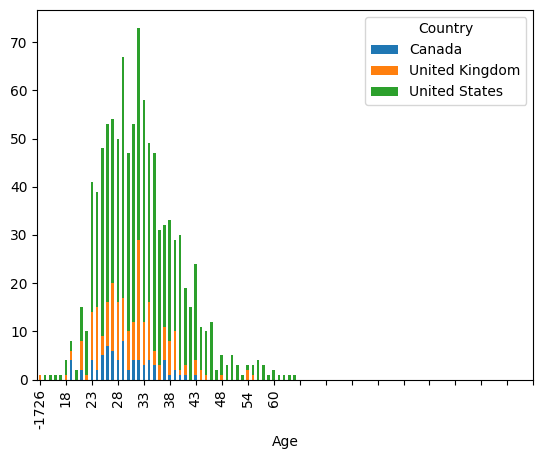

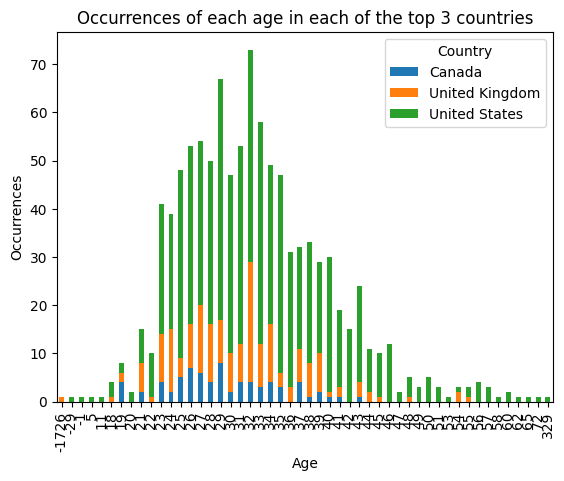

In [ ]:
# group the data by Country and Age, and count the occurrences
grouped = df.groupby(['Country', 'Age']).size().reset_index(name='counts')

# get the top 3 most common ages for each country
top_ages = grouped.groupby('Country').apply(lambda x: x.nlargest(3, 'counts')).reset_index(drop=True)

# get the top 3 most common countries
top_countries = grouped.groupby('Country').size().nlargest(3).index

# filter the original DataFrame to only include the top 3 most common countries
filtered_df = df[df['Country'].isin(top_countries)]

# group the filtered data by Age and Country, and count the occurrences
filtered_grouped = filtered_df.groupby(['Age', 'Country']).size().reset_index(name='counts')

# create a stacked bar plot for the occurrences of each age in each country
ax = filtered_grouped.pivot(index='Age', columns='Country', values='counts').plot(kind='bar', stacked=True)

# set the x-axis tick marks to show every 5 years
ax.set_xticks(np.arange(0, len(filtered_grouped['Age']), 5))

# create a stacked bar plot for the occurrences of each age in each country
filtered_grouped.pivot(index='Age', columns='Country', values='counts').plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Occurrences')
plt.title('Occurrences of each age in each of the top 3 countries')
plt.show()




**Explanation:** I'm first checking to see which top 10 countries have the most occurrences of the age of an individual through the table above. Then, I filter out the top 3 countries that have the most occurrences of age through two graphs. Through the coloured legend, it seems the most occurrences of mental health is in the United States so I will focus my attention on that.

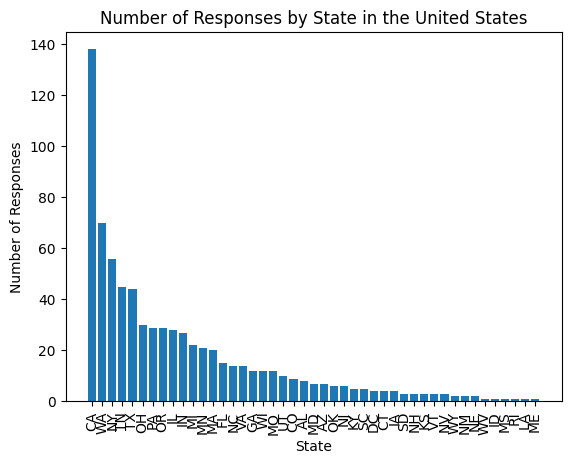

In [ ]:
# Filter the data to only include responses from the United States
us_df = df[df['Country'] == 'United States']

# Count the number of responses for each state
state_counts = us_df['state'].value_counts()

# Sort the states by the number of responses in descending order
state_counts = state_counts.sort_values(ascending=False)

# Create a bar plot
plt.bar(state_counts.index, state_counts.values)
plt.title('Number of Responses by State in the United States')
plt.xlabel('State')
plt.ylabel('Number of Responses')

plt.xticks(rotation=90)
plt.show()

**Explanation:** Now that I will focus my attention on the United States I decided to now find out which state has the highest occurances of mental health issues. From the graph above, it seems that California (CA) has quite a few responses.